In [157]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torch.utils.tensorboard import SummaryWriter

import utils

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

val_size = 10000
train_size = len(mnist_train) - val_size

train_data, val_data = random_split(mnist_train, [train_size, val_size])

BATCH_SIZE = 200
SHUFFLE = False

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
test_loader = DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=SHUFFLE)


In [ ]:
writer = SummaryWriter("runs/MNIST")

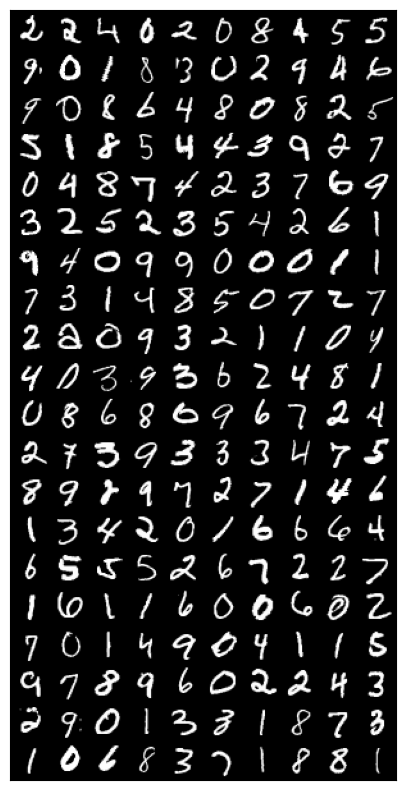

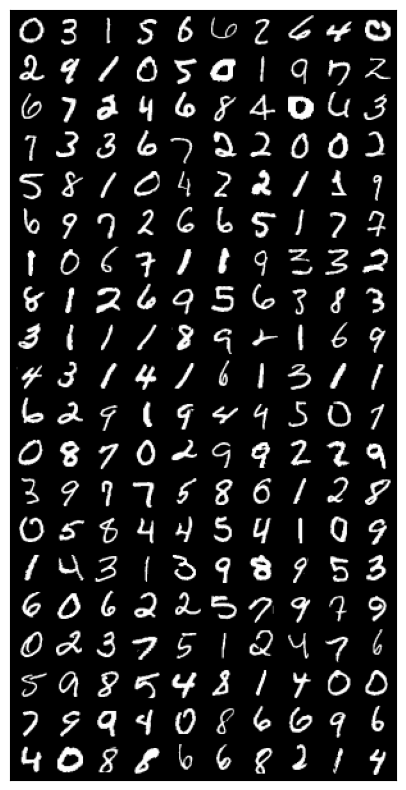

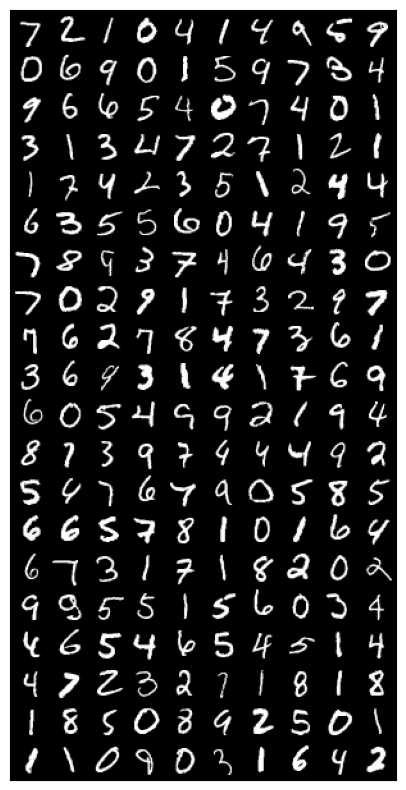

In [158]:
def show_batch(dl): 
    for images,lables in dl: 
        fig, ax = plt.subplots(figsize = (10,10))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,10).permute(1,2,0))
        break
    
# show a batch
show_batch(train_loader)
show_batch(val_loader)
show_batch(test_loader)

In [159]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")



tensor([1.], device='mps:0')


In [160]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.do1 = nn.Dropout(0.3)
        self.fc1 = nn.Linear(1600, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool1 = nn.MaxPool2d(2,2)
        self.pool2 = nn.MaxPool2d(2,2)
        self.ReLU = nn.ReLU()



    def forward(self, x):
        #mps_device = torch.device("mps")
        #x = x.to(mps_device)
        x = self.conv1(x)
        x = self.ReLU(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.ReLU(x)
        x = self.pool2(x)
        x = x.flatten(1)
        x = self.do1(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

batch nr: 0 len 250
batch nr: 1 len 250
batch nr: 2 len 250
batch nr: 3 len 250
batch nr: 4 len 250
batch nr: 5 len 250
batch nr: 6 len 250
batch nr: 7 len 250
batch nr: 8 len 250
batch nr: 9 len 250
batch nr: 10 len 250
batch nr: 11 len 250
batch nr: 12 len 250
batch nr: 13 len 250
batch nr: 14 len 250
batch nr: 15 len 250
batch nr: 16 len 250
batch nr: 17 len 250
batch nr: 18 len 250
batch nr: 19 len 250
batch nr: 20 len 250
batch nr: 21 len 250
batch nr: 22 len 250
batch nr: 23 len 250
batch nr: 24 len 250
batch nr: 25 len 250
batch nr: 26 len 250
batch nr: 27 len 250
batch nr: 28 len 250
batch nr: 29 len 250
batch nr: 30 len 250
batch nr: 31 len 250
batch nr: 32 len 250
batch nr: 33 len 250
batch nr: 34 len 250
batch nr: 35 len 250
batch nr: 36 len 250
batch nr: 37 len 250
batch nr: 38 len 250
batch nr: 39 len 250
batch nr: 40 len 250
batch nr: 41 len 250
batch nr: 42 len 250
batch nr: 43 len 250
batch nr: 44 len 250
batch nr: 45 len 250
batch nr: 46 len 250
batch nr: 47 len 250
ba

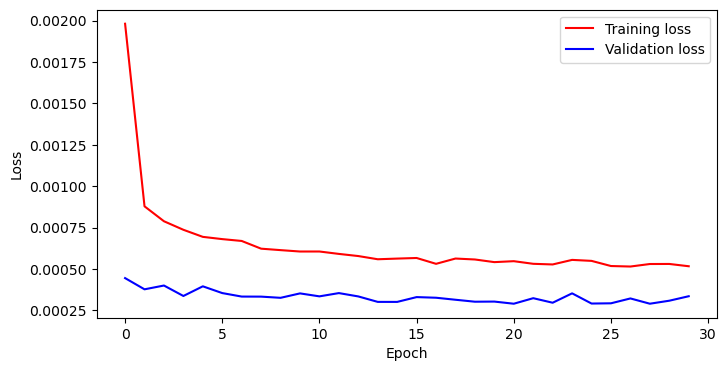

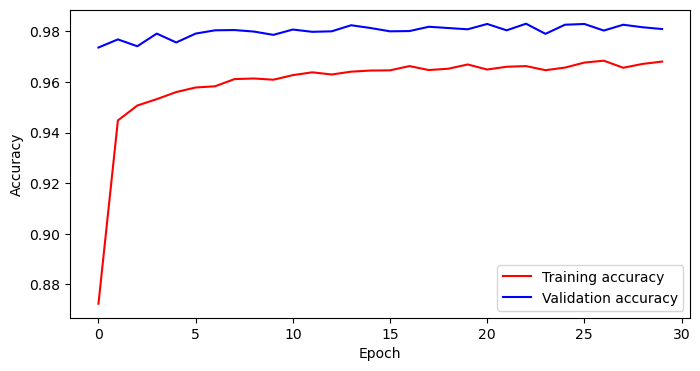

lowest loss for validation set: 0.0002905305564403534, with an accuracy of 0.9829
Test accuracy is 98.0%.


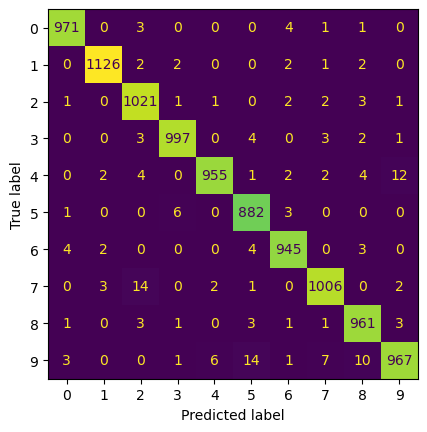

In [163]:
LEARNING_RATE = 0.01
epochs = 30
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
utils.train_model(model, criterion, optimizer, train_loader, val_loader, 'best_model_mnist.pt',writer, epochs, device)
model = torch.load('best_model_mnist.pt')
model.to(device)
utils.test_model(model, test_loader, device)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data2/test_32x32.mat
batch nr: 0 len 317
batch nr: 1 len 317
batch nr: 2 len 317
batch nr: 3 len 317
batch nr: 4 len 317
batch nr: 5 len 317
batch nr: 6 len 317
batch nr: 7 len 317
batch nr: 8 len 317
batch nr: 9 len 317
batch nr: 10 len 317
batch nr: 11 len 317
batch nr: 12 len 317
batch nr: 13 len 317
batch nr: 14 len 317
batch nr: 15 len 317
batch nr: 16 len 317
batch nr: 17 len 317
batch nr: 18 len 317
batch nr: 19 len 317
batch nr: 20 len 317
batch nr: 21 len 317
batch nr: 22 len 317
batch nr: 23 len 317
batch nr: 24 len 317
batch nr: 25 len 317
batch nr: 26 len 317
batch nr: 27 len 317
batch nr: 28 len 317
batch nr: 29 len 317
batch nr: 30 len 317
batch nr: 31 len 317
batch nr: 32 len 317
batch nr: 33 len 317
batch nr: 34 len 317
batch nr: 35 len 317
batch nr: 36 len 317
batch nr: 37 len 317
batch nr: 38 len 317
batch nr: 39 len 317
batch nr: 40 len 317
batch nr: 41 len 317
batch nr: 

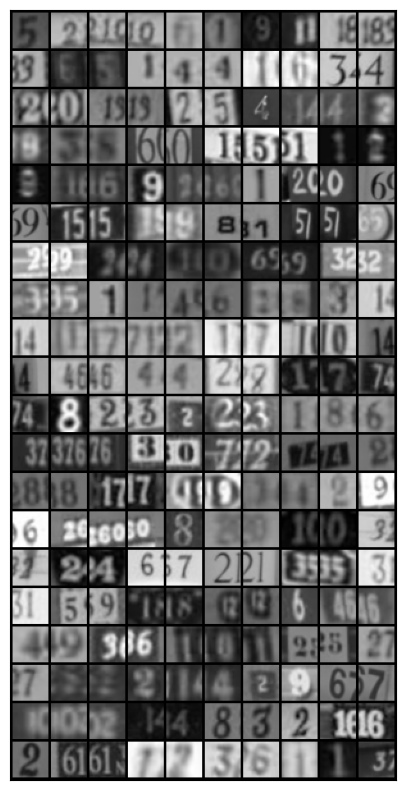

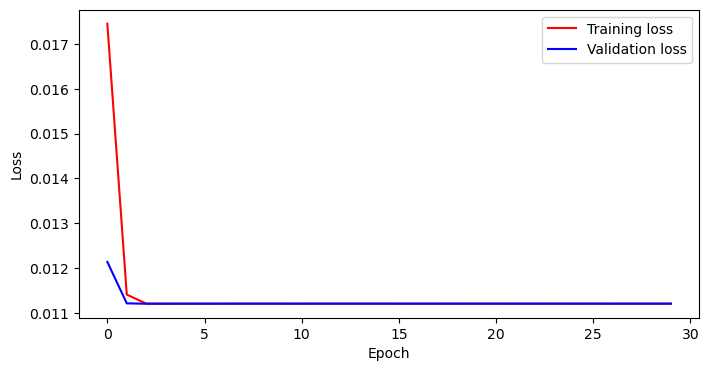

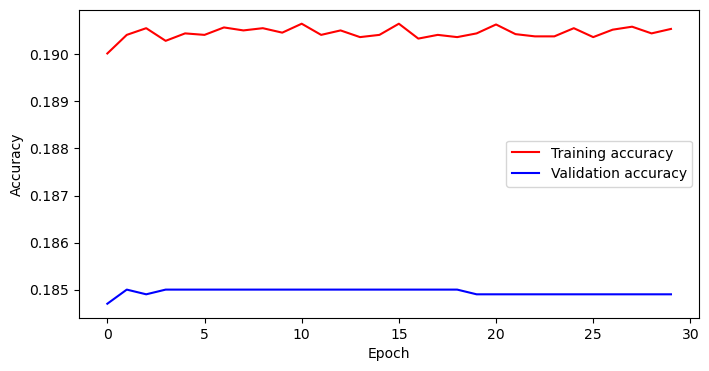

lowest loss for validation set: 0.011201639246940613, with an accuracy of 0.1849
Test accuracy is 20.0%.


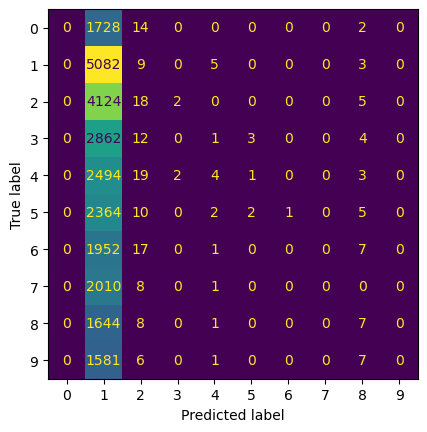

In [164]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(28),
    transforms.ToTensor()
])

svhn_train = datasets.SVHN(root='./data', split="train", download=True, transform=transform)
svhn_test = datasets.SVHN(root='./data2', split="test", download=True, transform=transform)

val_size = 10000
train_size = len(svhn_train) - val_size

train_data, val_data = random_split(svhn_train, [train_size, val_size])

train_svhn_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
val_svhn_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
svhn_test_loader = DataLoader(svhn_test, batch_size=BATCH_SIZE, shuffle=SHUFFLE)

model = torch.load('best_model_mnist.pt')

for i, param in enumerate(model.parameters()):
    if i < 7:
        param.requires_grad = False
        
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
utils.train_model(model, criterion, optimizer, train_svhn_loader, val_svhn_loader,'best_model_svhn.pt', writer, epochs, device)
model = torch.load('best_model_svhn.pt')
model.to(device)
utils.test_model(model, svhn_test_loader)
